# Approfondissement sur les distributions 1D - Solution

In [1]:
import openturns as ot
import numpy as np

## Exercice 1 : Distribution produit

Nous voulons calculer la distribution du produit entre une distribution uniforme et une distribution gaussienne.
- Définir la variable `U` ayant une distribution uniforme de bornes a = 0, b = 1.
- Définir la variable `N` ayant une distribution normale de paramètre $0$ et $1$.
- Définir la variable `Z = U * N` à l'aide de l'opérateur arithmétique `*`.
- Afficher la PDF de `Z`.

## Solution de l'exercice 1 : Distribution produit


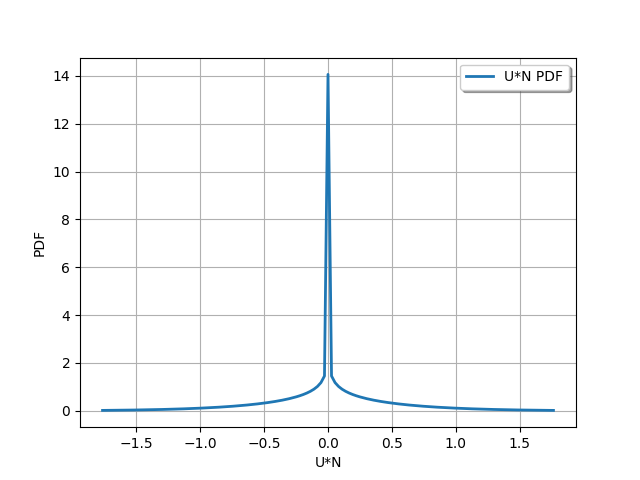

In [2]:
u = ot.Uniform(0, 1)
n = ot.Normal(0, 1)
z = u * n
z.setDescription(["U*N"])
z.drawPDF()

## Exercice 2 : contrainte axiale sur une poutre

Nous considérons une poutre simple contrainte par une charge en traction $F$ des deux cotés.

<img src="axial-stressed-beam.png" width="250">

La géométrie est supposée être déterministe. Le diamètre $D$ vaut:
$$
D=0.02 \textrm{ (m)}.
$$

Par définition, la contrainte élastique est égale à la charge divisée par la suface. Comme la surface vaut $\pi D^2/4$, la contrainte est égale à:
$$
C = \frac{F}{\pi D^2/4}.
$$
On considère qu'il y a fracture lorsque la poutre se plastifie, i.e. lorsque la contrainte axiale dévient plus grande que la contrainte elastique:
$$
R - \frac{F}{\pi D^2/4} \leq 0
$$
où $R$ est la force.
 
La fonction de l'état limite $G$ s'écrit alors: 
$$
G(R,F) = R - \frac{F}{\pi D^2/4},
$$
pour tous $R,F\in\mathbb{R}$.
La valeur du paramètre $D$ implique:
$$
D^2/4 = 10^{-4},
$$
ce qui donne l'équation suivante:
$$
G(R,F) = R - \frac{F}{10^{-4} \pi}.
$$

Nous considérons les fonctions de distribution suivantes.

* R : LogNormal($\mu_R=3\times 10^6$, $\sigma_R=3\times 10^5$) [Pa]
* F : Normal($\mu_F=750$, $\sigma_F=50$) [N]

où $\mu_R=E(R)$ et $\sigma_R=\sqrt{V(R)}$ représente la moyenne et la déviation standard de $R$.

La probabilité de frature est égale à: 
$$
P_f = \text{Prob}(G(R,F) \leq 0).
$$

Le but de l'exercice est de déterminer $P_f$. 

- Définir la v.a. `F` associée à $F$. Tracer sa densité de probabilité.
- Définir la v.a. `R` associée à $R$. Pour cela, utiliser la classe `LogNormalMuSigma`. Tracer sa densité de probabilité.
- Définir la v.a. `D` associée au diamètre de la poutre.
- Définir la v.a. `G` associée à l'équation $G = R - \frac{F}{\pi D^2/4}$, en utilisant l'opérateur arithméthique `-`.
- Calculer la probabilité $P_f = \text{Prob}(G \leq 0)$.

## Solution de l'exercice 2 : Contrainte axiale sur une poutre

Création de la variable $F$.

In [3]:
F = ot.Normal(750., 50.)
F.setName('Traction_load')
F.setDescription('F')

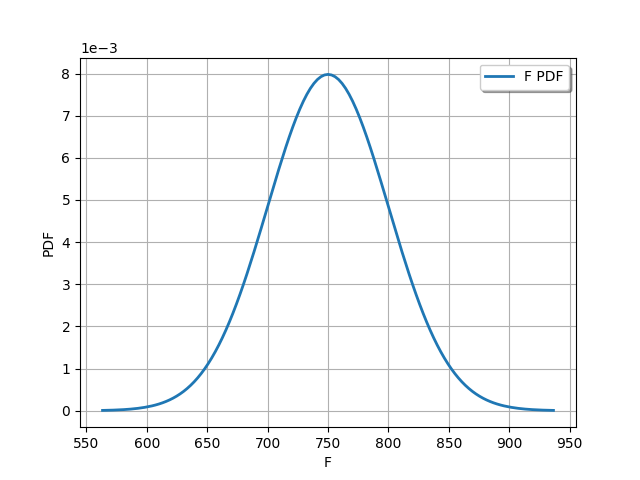

In [4]:
F.drawPDF()

Création de la variable $R$. 

In [5]:
R = ot.LogNormalMuSigma(3.e6, 3.e5, 0.0).getDistribution()
R.setName('Yield strength')
R.setDescription('R')

In [6]:
R.getStandardDeviation()

class=Point name=Unnamed dimension=1 values=[300000]

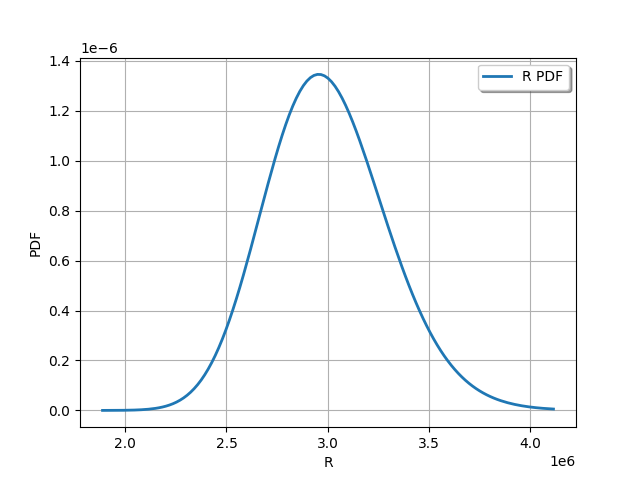

In [7]:
R.drawPDF()

Definition de $D$.

In [8]:
D = 0.02

Définition de la variable $G$.

In [9]:
G = R - F/(np.pi * D**2/4)

Calcul de la probabilité recherchée.

In [10]:
pf = G.computeCDF(0)
pf

0.029198194624830504

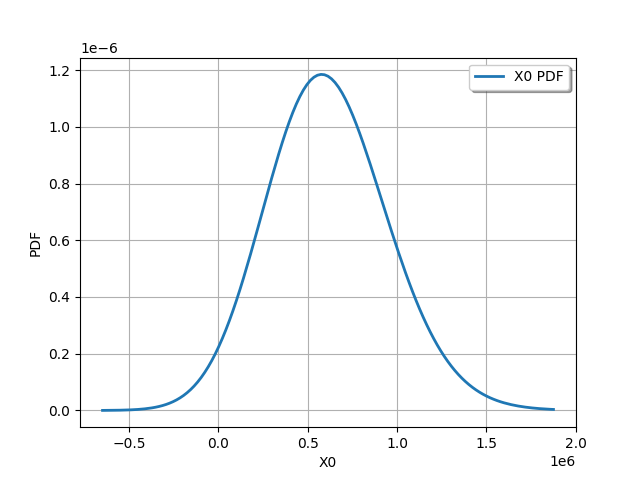

In [11]:
G.drawPDF()

## Exercice 3 : une autre distribution uniforme

L'objectif de cet exercice est d'utiliser la classe `PythonDistribution` pour créer la nouvelle distribution `UDistribution` implémentant la loi uniforme.

La fonction de répartition de la loi uniforme est:

$$
P(X\leq x) = 
\left\{
\begin{array}{l}
0 \textrm{ si } x\leq a, \\
\frac{x-a}{b-a} \textrm{ si } x\leq b, \\
1 \textrm{ sinon}.
\end{array}
\right.
$$

- Créer la classe `UDistribution` dérivant de la classe `PythonDistribution`.
- Créer le constructeur de la classe, c'est à dire la méthode `__init__`.
- Créer la méthode `computeCDF` qui calcule la fonction de répartition.

Pour vous aider, nous vous fournissons un squelette de solution, dans lequel vous compléterez les sections de code `TODO`.

    class UDistribution(ot.PythonDistribution):
        def __init__(self, a, b):
            super(UDistribution, self).__init__(TODO)
            TODO
        def computeCDF(self, x):
            u = x[0]
            if TODO:
                p = TODO
            elif TODO:
                p = TODO
            else:
                p = TODO
            return p


## Solution de l'exercice 3 : une autre distribution uniforme

Pour définir `U`, on se contente ici de la méthode `computeCDF`.

In [22]:
class UDistribution(ot.PythonDistribution):
    def __init__(self, a, b):
        super(UDistribution, self).__init__(1)
        if a > b:
            b,a = a,b 
        self.a = a
        self.b = b
    def computeCDF(self, x):
        u = x[0]
        if u <= self.a:
            p = 0.0
        elif u < self.b:
            p = (u - self.a) / (self.b - self.a)
        else:
            p = 1.0
        return p

In [43]:
U = ot.Distribution(UDistribution(3, 4.05))
U.setDescription(["U"])

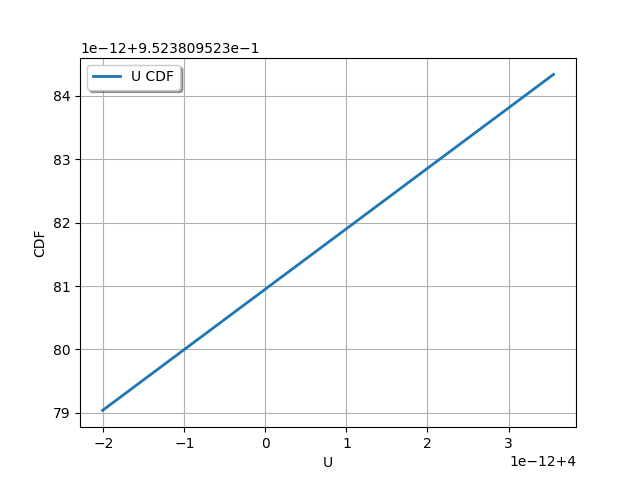

In [44]:
U.drawCDF()

`drawPDF` permet de tracer la densité. Celle-ci est approximée par des différences finies de la fonction de répartition.

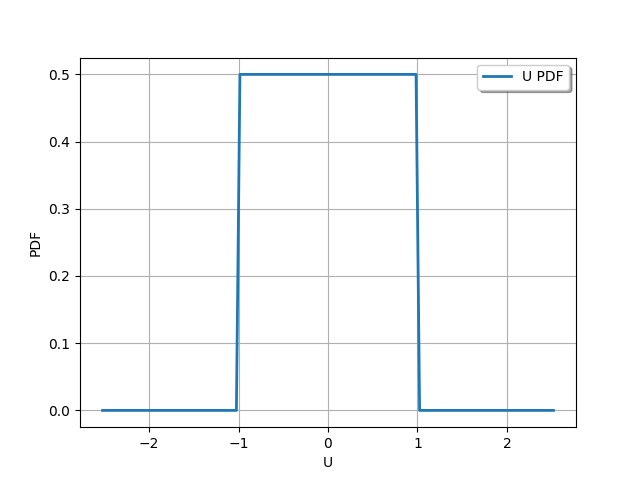

In [15]:
U.drawPDF()

## Exercice 4 : un débit positif

On considère la variable Q associée au débit d'une rivière ($m^3/s$). On fait l'hypothèse qu'il s'agit du débit maximal annuel. C'est pourquoi nous choisissons de modéliser cette variable par la loi de Gumbel de paramètres suivants :

- échelle=500, 
- mode=900.

De plus, le débit est une variable positive de telle sorte que la distribution doit être tronquée avec une borne inférieure.

L'objectif de cet exercice est de définir la variable aléatoire `Q` associée à cette distribution.

- Utiliser la classe `Gumbel` pour définir les paramètres de la loi de Gumbel associée. 
- Utiliser la classe `ParametrizedDistribution` pour créer la variable `Quntruncated` associée à la variable non tronquée.
- Dessiner la PDF de `Quntruncated`.
- Utiliser la classe `TruncatedDistribution` pour créer la variable `Q` associée à la loi de Gumbel tronquée. 
- Dessiner la PDF de `Q` : que remarquez-vous ?

## Solution de l'exercice 4 : un débit positif

In [16]:
Quntruncated = ot.Gumbel(500.,900.)

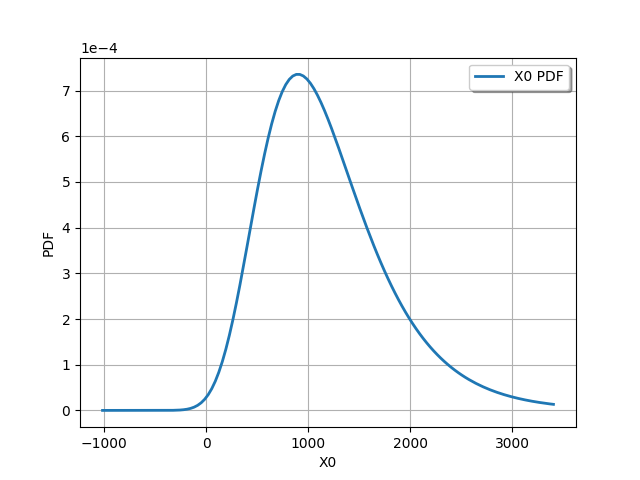

In [17]:
Quntruncated.drawPDF()

In [18]:
Q = ot.TruncatedDistribution(Quntruncated, 0., ot.TruncatedDistribution.LOWER)

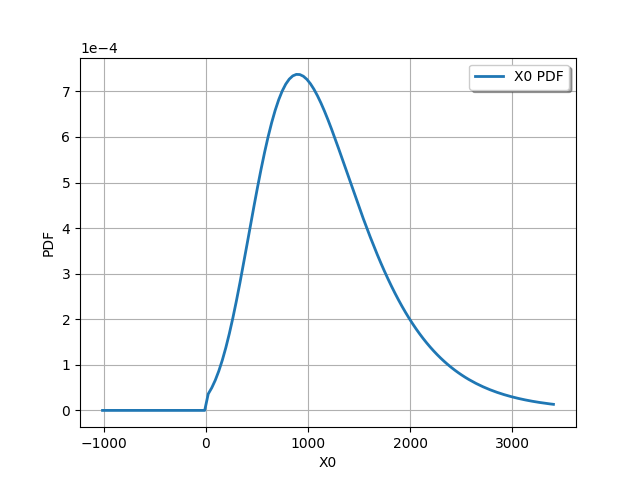

In [19]:
Q.drawPDF()

On remarque une discontinuité en $Q=0$ dû à la troncature. 